# **CSE422: Artificial Intelligence**

## **Project Name: Predicting State of Breast Cancer**
## **Group Number: 02**

### **Members:**

> Aritra Ghose

> Anindya Majumder

> Mir Muhammad Fuad

In [ ]:
!pip install scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn import tree
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


# Data Visualization

At first, we imported the required libraries and modules in order to build the models.

In [ ]:
data = pd.read_csv('data.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
print("The Shape of the dataset is :", data.shape)
print("Number of Columns:", data.shape[1])
print("Number of Rows:", data.shape[0])

The Shape of the dataset is : (569, 33)
Number of Columns: 33
Number of Rows: 569


In [ ]:
print("Columns in the dataset:", data.columns)


Columns in the dataset: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


<Axes: >

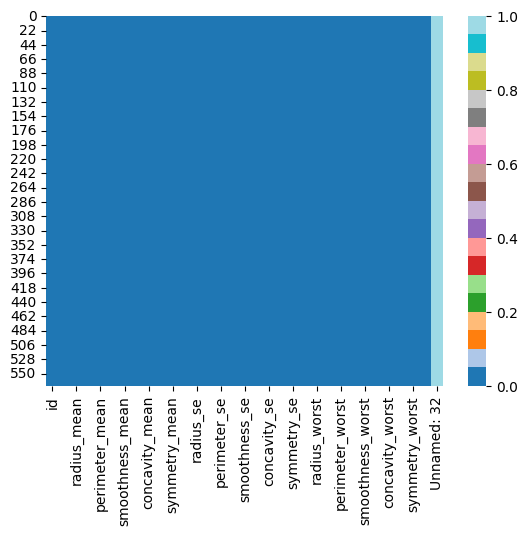

In [ ]:
seaborn.heatmap(data.isnull(), cmap = 'tab20')

In [ ]:
print("Type of the data and other informations:")
data.info()

Type of the data and other informations:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null  

In [ ]:
print("Unique Labels in the dependent column: ", data["diagnosis"].unique())

Unique Labels in the dependent column:  ['M' 'B']


In [ ]:
print("The number of occurences of the unique labels:\n", data["diagnosis"].value_counts())

The number of occurences of the unique labels:
 B    357
M    212
Name: diagnosis, dtype: int64


In [ ]:
print("Correlation of the all the features:")
data.corr()

Correlation of the all the features:


<ipython-input-80-797bf6ce1467>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,NaN


<ipython-input-81-4131079f344d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  seaborn.heatmap(data.corr())


<Axes: >

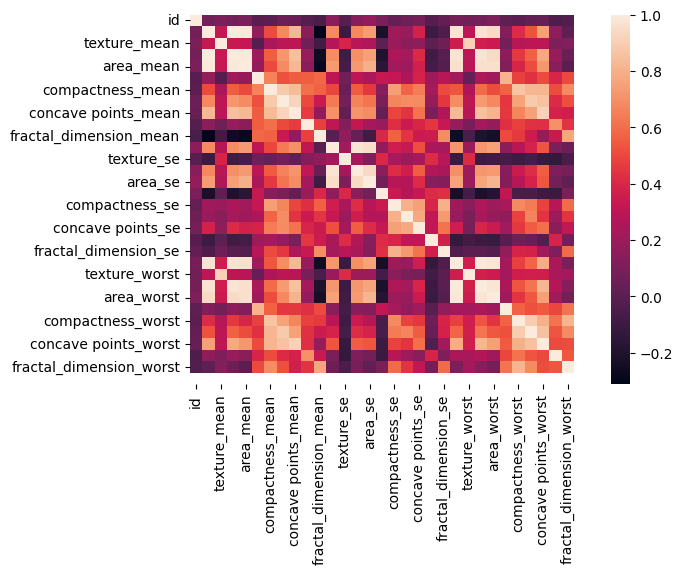

In [ ]:
seaborn.heatmap(data.corr())


# Pre-processing

> ***Dealing with the null/NaN values***

In [ ]:
print("Again, shape of the data:")
data.shape

Again, shape of the data:


(569, 33)

We first need to check if there are any null values in the dataset or not. (We know there is, from the earlier heatmap)


In [ ]:
print("Features and the number of null values associated with them:")
data.isnull().sum()

Features and the number of null values associated with them:


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

So, here we can see that there is a feature that contains null values. We can handle this in multiple ways. But we think this column does not provide any valuable information in the predictions, we can choose to remove the feature.


In [ ]:
data = data.drop(['Unnamed: 32'], axis = 1)

In [ ]:
print("After removing, checking again:")
data.isnull().sum()

After removing, checking again:


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Okay, that column is removed. Now, it shows that we do not have any null values in any of the columns.

> ***Feature Label Encoding***

Encoding the labels in feature class "diagnosis":

In [ ]:
le = LabelEncoder()
data['diagnosis_encoded'] = le.fit_transform(data['diagnosis'])


In [ ]:
for i in range(20, 25):
  print(data["diagnosis"][i], "--->", data["diagnosis_encoded"][i])

B ---> 0
B ---> 0
M ---> 1
M ---> 1
M ---> 1


So, "Malignant" is labeled as 1 and "Benign" is labeled as 0

So, the new and updated Dataset looks like this:

In [ ]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_encoded
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


Now, we need to get rid of the redundant feature "diagnosis" which is already encoded and added to the dataset:

In [ ]:
data = data.drop(["diagnosis"], axis=1)


So the **updated Dataset**:

In [ ]:
data

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_encoded
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1



---
> ***Dataset Splitting***



Now, lets first split dependent portion and independent portion of the data:


In [ ]:
data_x = data.drop(['diagnosis_encoded'], axis=1)
data_y = data["diagnosis_encoded"]

In [ ]:
data_x

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
data_y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis_encoded, Length: 569, dtype: int64

In [ ]:
print("The number of occurences of the unique labels in data_y:\n", data_y.value_counts())

The number of occurences of the unique labels in data_y:
 0    357
1    212
Name: diagnosis_encoded, dtype: int64


**Now lets split the dataset into training set and test set by 70:30 distribution**

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size = 0.3, random_state = 1, stratify = data_y)

In [ ]:
print("After splitting: ")
print("Training Data:: ", train_x.shape, train_y.shape)
print("Test Data: ", test_x.shape, test_y.shape)

After splitting: 
Training Data::  (398, 31) (398,)
Test Data:  (171, 31) (171,)


In [ ]:
train_x

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
215,8810987,13.86,16.93,90.96,578.9,0.10260,0.15170,0.099010,0.056020,0.2106,...,15.75,26.93,104.40,750.1,0.14600,0.43700,0.463600,0.16540,0.3630,0.10590
338,897880,10.05,17.53,64.41,310.8,0.10070,0.07326,0.025110,0.017750,0.1890,...,11.16,26.84,71.98,384.0,0.14020,0.14020,0.105500,0.06499,0.2894,0.07664
218,8811842,19.80,21.56,129.70,1230.0,0.09383,0.13060,0.127200,0.086910,0.2094,...,25.73,28.64,170.30,2009.0,0.13530,0.32350,0.361700,0.18200,0.3070,0.08255
287,8913,12.89,13.12,81.89,515.9,0.06955,0.03729,0.022600,0.011710,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.11470,0.118600,0.05366,0.2309,0.06915
458,9112594,13.00,25.13,82.61,520.2,0.08369,0.05073,0.012060,0.017620,0.1667,...,14.34,31.88,91.06,628.5,0.12180,0.10930,0.044620,0.05921,0.2306,0.06291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,901034302,12.54,18.07,79.42,491.9,0.07436,0.02650,0.001194,0.005449,0.1528,...,13.72,20.98,86.82,585.7,0.09293,0.04327,0.003581,0.01635,0.2233,0.05521
301,892604,12.46,19.89,80.43,471.3,0.08451,0.10140,0.068300,0.030990,0.1781,...,13.46,23.07,88.13,551.3,0.10500,0.21580,0.190400,0.07625,0.2685,0.07764
406,905189,16.14,14.86,104.30,800.0,0.09495,0.08501,0.055000,0.045280,0.1735,...,17.71,19.58,115.90,947.9,0.12060,0.17220,0.231000,0.11290,0.2778,0.07012
433,908445,18.82,21.97,123.70,1110.0,0.10180,0.13890,0.159400,0.087440,0.1943,...,22.66,30.93,145.30,1603.0,0.13900,0.34630,0.391200,0.17080,0.3007,0.08314


> ***Feature Scaling***

In [ ]:
print(type(train_x))
print(type(test_x))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
features = ['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(train_x[features])
train_x[features] = min_max_scaler.transform(train_x[features])

In [ ]:
print("per-feature minimum after scaling:\n {}".format(train_x.min(axis=0)))
print()
print("per-feature maximum after scaling:\n {}".format(train_x.max(axis=0)))

per-feature minimum after scaling:
 id                         0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dty

In [ ]:
test_x[features] = min_max_scaler.transform(test_x[features])

In [ ]:
print(type(train_x))
print(type(test_x))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
train_x

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
215,9.658952e-03,0.336562,0.299585,0.329607,0.184687,0.451115,0.392600,0.232200,0.292838,0.528283,...,0.278193,0.397388,0.268888,0.138837,0.446971,0.388015,0.370288,0.568385,0.407057,0.333596
338,9.757472e-04,0.150154,0.324481,0.144085,0.070965,0.433962,0.146629,0.058888,0.092786,0.419192,...,0.114906,0.394989,0.107426,0.048860,0.405097,0.095523,0.084265,0.223333,0.261975,0.141677
218,9.659890e-03,0.627183,0.491701,0.600307,0.460870,0.371942,0.326435,0.298311,0.454313,0.522222,...,0.633227,0.442964,0.597091,0.448240,0.369721,0.276162,0.288898,0.625430,0.296669,0.180441
287,2.666486e-07,0.289104,0.141494,0.266229,0.157964,0.152749,0.033835,0.053002,0.061213,0.139899,...,0.202419,0.093817,0.184222,0.096294,0.087142,0.070393,0.094728,0.184399,0.146659,0.092549
458,9.989911e-03,0.294486,0.639834,0.271260,0.159788,0.280401,0.075980,0.028283,0.092107,0.306566,...,0.228033,0.529318,0.202450,0.108951,0.272255,0.065071,0.035639,0.203471,0.146067,0.051620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,9.887128e-01,0.271980,0.346888,0.248969,0.147784,0.196172,0.000000,0.002800,0.028484,0.236364,...,0.205977,0.238806,0.181334,0.098432,0.063822,0.000000,0.002860,0.056186,0.131678,0.001115
301,9.699578e-04,0.268066,0.422407,0.256027,0.139046,0.287804,0.234870,0.160178,0.161997,0.364141,...,0.196727,0.294510,0.187858,0.089977,0.150964,0.170026,0.152077,0.262027,0.220777,0.148236
406,9.837675e-04,0.448114,0.213693,0.422822,0.278473,0.382053,0.183474,0.128987,0.236696,0.340909,...,0.347919,0.201493,0.326162,0.187451,0.263591,0.127058,0.184505,0.387973,0.239109,0.098911
433,9.873404e-04,0.579236,0.508714,0.558382,0.409968,0.443893,0.352462,0.373827,0.457083,0.445960,...,0.524013,0.503998,0.472583,0.348457,0.396433,0.298631,0.312460,0.586942,0.284250,0.184311


In [ ]:
test_x

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
399,0.000983,0.235775,0.313278,0.219901,0.122333,0.345220,0.112324,0.066909,0.085625,0.397475,...,0.196371,0.332356,0.177250,0.092607,0.291026,0.127453,0.115735,0.184055,0.239306,0.171652
16,0.000921,0.376682,0.432365,0.356020,0.229480,0.415636,0.142678,0.173429,0.274909,0.265657,...,0.396300,0.502665,0.363514,0.234172,0.449859,0.141742,0.232748,0.552921,0.288587,0.177883
369,0.009880,0.735310,0.505809,0.722591,0.567762,0.484517,0.529633,0.574109,0.784631,0.385859,...,0.701885,0.367271,0.720106,0.501819,0.327124,0.340219,0.379872,0.835739,0.231815,0.201364
174,0.000947,0.179999,0.225726,0.165607,0.087423,0.318588,0.051803,0.000000,0.000000,0.438384,...,0.128424,0.191365,0.113502,0.054832,0.169735,0.024282,0.000000,0.000000,0.225705,0.043290
71,0.000934,0.093302,0.204564,0.104814,0.042630,0.408053,0.396990,0.201829,0.150131,0.425253,...,0.064141,0.097281,0.060511,0.024381,0.264313,0.197422,0.114537,0.164467,0.135817,0.349993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,0.100838,0.327756,0.274689,0.307246,0.183245,0.362372,0.144403,0.041088,0.098275,0.288384,...,0.281750,0.218017,0.254943,0.144564,0.305465,0.111488,0.096326,0.299107,0.244628,0.149416
558,0.001006,0.372278,0.538174,0.367549,0.217858,0.289790,0.333960,0.241323,0.195295,0.198990,...,0.268588,0.406450,0.276358,0.134757,0.133637,0.269855,0.292492,0.379725,0.136606,0.163977
103,0.000937,0.141641,0.402075,0.140871,0.065663,0.432157,0.220978,0.144325,0.158338,0.446970,...,0.100676,0.394723,0.108621,0.043256,0.518446,0.184216,0.211182,0.335017,0.208358,0.195855
361,0.000979,0.309164,0.492116,0.289637,0.170774,0.299630,0.116745,0.078424,0.126712,0.381313,...,0.223052,0.457889,0.211813,0.107157,0.215941,0.121638,0.096805,0.192921,0.211315,0.075692




> ***Feature Selection***






The "id" feature in the dataset does not contribute much in the prediction of our model. So, we can get rid of this feature to only focus on the features that contributes in the prediction.

In [ ]:
train_x = train_x.drop(['id'], axis=1)
test_x = test_x.drop(['id'], axis=1)

In [ ]:
train_x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
215,0.336562,0.299585,0.329607,0.184687,0.451115,0.392600,0.232200,0.292838,0.528283,0.400847,...,0.278193,0.397388,0.268888,0.138837,0.446971,0.388015,0.370288,0.568385,0.407057,0.333596
338,0.150154,0.324481,0.144085,0.070965,0.433962,0.146629,0.058888,0.092786,0.419192,0.276907,...,0.114906,0.394989,0.107426,0.048860,0.405097,0.095523,0.084265,0.223333,0.261975,0.141677
218,0.627183,0.491701,0.600307,0.460870,0.371942,0.326435,0.298311,0.454313,0.522222,0.118008,...,0.633227,0.442964,0.597091,0.448240,0.369721,0.276162,0.288898,0.625430,0.296669,0.180441
287,0.289104,0.141494,0.266229,0.157964,0.152749,0.033835,0.053002,0.061213,0.139899,0.118008,...,0.202419,0.093817,0.184222,0.096294,0.087142,0.070393,0.094728,0.184399,0.146659,0.092549
458,0.294486,0.639834,0.271260,0.159788,0.280401,0.075980,0.028283,0.092107,0.306566,0.090042,...,0.228033,0.529318,0.202450,0.108951,0.272255,0.065071,0.035639,0.203471,0.146067,0.051620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.271980,0.346888,0.248969,0.147784,0.196172,0.000000,0.002800,0.028484,0.236364,0.034110,...,0.205977,0.238806,0.181334,0.098432,0.063822,0.000000,0.002860,0.056186,0.131678,0.001115
301,0.268066,0.422407,0.256027,0.139046,0.287804,0.234870,0.160178,0.161997,0.364141,0.259534,...,0.196727,0.294510,0.187858,0.089977,0.150964,0.170026,0.152077,0.262027,0.220777,0.148236
406,0.448114,0.213693,0.422822,0.278473,0.382053,0.183474,0.128987,0.236696,0.340909,0.180297,...,0.347919,0.201493,0.326162,0.187451,0.263591,0.127058,0.184505,0.387973,0.239109,0.098911
433,0.579236,0.508714,0.558382,0.409968,0.443893,0.352462,0.373827,0.457083,0.445960,0.234746,...,0.524013,0.503998,0.472583,0.348457,0.396433,0.298631,0.312460,0.586942,0.284250,0.184311


In [ ]:
test_x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
399,0.235775,0.313278,0.219901,0.122333,0.345220,0.112324,0.066909,0.085625,0.397475,0.210805,...,0.196371,0.332356,0.177250,0.092607,0.291026,0.127453,0.115735,0.184055,0.239306,0.171652
16,0.376682,0.432365,0.356020,0.229480,0.415636,0.142678,0.173429,0.274909,0.265657,0.190254,...,0.396300,0.502665,0.363514,0.234172,0.449859,0.141742,0.232748,0.552921,0.288587,0.177883
369,0.735310,0.505809,0.722591,0.567762,0.484517,0.529633,0.574109,0.784631,0.385859,0.236441,...,0.701885,0.367271,0.720106,0.501819,0.327124,0.340219,0.379872,0.835739,0.231815,0.201364
174,0.179999,0.225726,0.165607,0.087423,0.318588,0.051803,0.000000,0.000000,0.438384,0.201483,...,0.128424,0.191365,0.113502,0.054832,0.169735,0.024282,0.000000,0.000000,0.225705,0.043290
71,0.093302,0.204564,0.104814,0.042630,0.408053,0.396990,0.201829,0.150131,0.425253,0.838136,...,0.064141,0.097281,0.060511,0.024381,0.264313,0.197422,0.114537,0.164467,0.135817,0.349993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,0.327756,0.274689,0.307246,0.183245,0.362372,0.144403,0.041088,0.098275,0.288384,0.239619,...,0.281750,0.218017,0.254943,0.144564,0.305465,0.111488,0.096326,0.299107,0.244628,0.149416
558,0.372278,0.538174,0.367549,0.217858,0.289790,0.333960,0.241323,0.195295,0.198990,0.237924,...,0.268588,0.406450,0.276358,0.134757,0.133637,0.269855,0.292492,0.379725,0.136606,0.163977
103,0.141641,0.402075,0.140871,0.065663,0.432157,0.220978,0.144325,0.158338,0.446970,0.275000,...,0.100676,0.394723,0.108621,0.043256,0.518446,0.184216,0.211182,0.335017,0.208358,0.195855
361,0.309164,0.492116,0.289637,0.170774,0.299630,0.116745,0.078424,0.126712,0.381313,0.142373,...,0.223052,0.457889,0.211813,0.107157,0.215941,0.121638,0.096805,0.192921,0.211315,0.075692


In [ ]:
data_corr = data.corr()
data_corr

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_encoded
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,0.039769
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499


<Axes: >

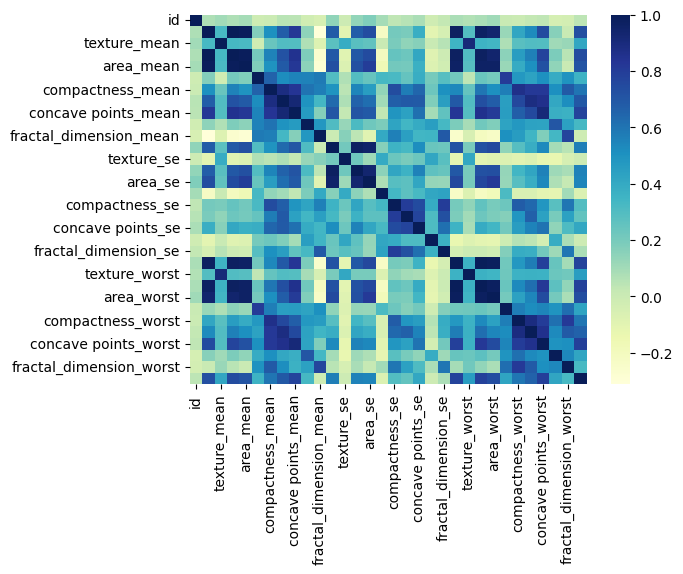

In [ ]:
seaborn.heatmap(data_corr, cmap = 'YlGnBu')

# Dataset Training

We will be first implementing 4 Models by training on our training data `data_x`.


> **The Models:**
> *   **Decision Tree**
> *   **Support Vector Machine**
> *   **Logistic Regression**
> *   **Naive Bayes Classifier**
> *   **K-Nearest Neighbors**





---


> **`Decision Tree Model`**

In [ ]:
# Training the Model
dt = tree.DecisionTreeClassifier()
dt = dt.fit(train_x, train_y)

[Text(0.6944444444444444, 0.9375, 'x[22] <= 0.327\ngini = 0.467\nsamples = 398\nvalue = [250, 148]'),
 Text(0.5, 0.8125, 'x[27] <= 0.505\ngini = 0.177\nsamples = 275\nvalue = [248, 27]'),
 Text(0.2777777777777778, 0.6875, 'x[20] <= 0.316\ngini = 0.069\nsamples = 251\nvalue = [242, 9]'),
 Text(0.16666666666666666, 0.5625, 'x[28] <= 0.0\ngini = 0.025\nsamples = 237\nvalue = [234, 3]'),
 Text(0.1111111111111111, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2222222222222222, 0.4375, 'x[6] <= 0.275\ngini = 0.017\nsamples = 236\nvalue = [234, 2]'),
 Text(0.1111111111111111, 0.3125, 'x[21] <= 0.566\ngini = 0.009\nsamples = 228\nvalue = [227, 1]'),
 Text(0.05555555555555555, 0.1875, 'gini = 0.0\nsamples = 211\nvalue = [211, 0]'),
 Text(0.16666666666666666, 0.1875, 'x[21] <= 0.574\ngini = 0.111\nsamples = 17\nvalue = [16, 1]'),
 Text(0.1111111111111111, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2222222222222222, 0.0625, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]

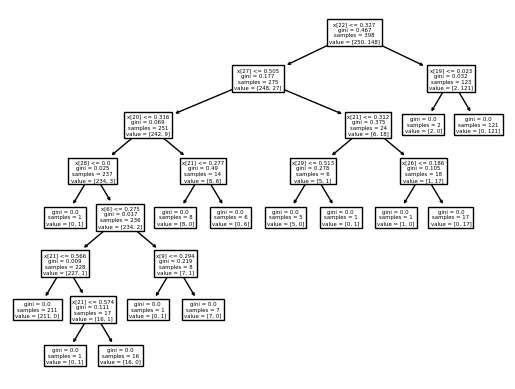

In [ ]:
# The Decision Tree
tree.plot_tree(dt)

In [ ]:
# Training Accuracy
accuracy = dt.score(train_x, train_y)
print(f"Accuracy of the model: {round(accuracy*100, 2)}%")

Accuracy of the model: 100.0%




> **`Support Vector Machine (SVM) Model`**




In [ ]:
# Training the model
svm_c = svm.SVC()
svm_c.fit(train_x, train_y)


SVC()

In [ ]:
# Training Accuracy
accuracy = svm_c.score(train_x, train_y)
print(f"Accuracy of the model: {round(accuracy*100, 2)}%")

Accuracy of the model: 99.5%






> **`Logistic Regression Model`**

In [ ]:
# Training the model
logistic_reg = LogisticRegression(random_state=0).fit(train_x, train_y)

In [ ]:
# Training Accuracy
accuracy = logistic_reg.score(train_x, train_y)
print(f"Accuracy of the model: {round(accuracy*100, 2)}%")

Accuracy of the model: 97.24%


> **`Naive Bayes Classifier Model`**

In [ ]:
# Training the model
nbc = GaussianNB()
nbc.fit(train_x, train_y)

GaussianNB()

In [ ]:
# Training Accuracy
accuracy = nbc.score(train_x, train_y)
print(f"Accuracy of the model: {round(accuracy*100, 2)}%")

Accuracy of the model: 94.22%





**`K-Nearest Neighbors`**

In [ ]:
# Creating the KNN model
knn = KNeighborsClassifier(n_neighbors=13)

# Training the KNN model
knn.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=13)

In [ ]:
# Training Accuracy
accuracy = knn.score(train_x, train_y)
print(f"Accuracy of the model: {round(accuracy*100, 2)}%")

Accuracy of the model: 96.48%


# Dataset Testing




---


> **`Decision Tree Model`**

In [ ]:
# Test Accuracy
accuracy = dt.score(test_x, test_y)
print(f"Accuracy of the model: {round(accuracy*100, 2)}%")

Accuracy of the model: 93.57%


---


> **`Support Vector Machine (SVM) Model`**

In [ ]:
# Test Accuracy
accuracy = svm_c.score(test_x, test_y)
print(f"Accuracy of the model: {round(accuracy*100, 2)}%")

Accuracy of the model: 95.32%


---


> **`Logistic Regression Model`**

In [ ]:
# Test Accuracy
accuracy = logistic_reg.score(test_x, test_y)
print(f"Accuracy of the model: {round(accuracy*100, 2)}%")

Accuracy of the model: 94.15%


---


> **`Naive Bayes Classifier Model`**

In [ ]:
# Test Accuracy
accuracy = nbc.score(test_x, test_y)
print(f"Accuracy of the model: {round(accuracy*100, 2)}%")

Accuracy of the model: 92.98%







**`K-Nearest Neighbor`**











In [ ]:
# Test Accuracy
accuracy = knn.score(test_x, test_y)
print(f"Accuracy of the model: {round(accuracy*100, 2)}%")

Accuracy of the model: 95.32%


# Result Analysis

In [ ]:
def find_f1_score(confusion_matrix):
  true_positive = confusion_matrix[0][0]
  true_negative = confusion_matrix[1][1]
  false_positive = confusion_matrix[0][1]
  false_negative = confusion_matrix[1][0]
  recall = true_positive/(true_positive + false_negative)
  precision = true_positive/(true_positive + false_positive)
  f1_score = (2*precision*recall)/ (precision+recall)
  return (true_positive, false_positive, false_positive, false_negative, recall, precision, f1_score)

**`Naive Bayes Classifier`**

In [ ]:
predicted_labels = nbc.predict(test_x)

class_report = classification_report(test_y, predicted_labels)
print("Classification Report:")
print(class_report)

# Calculate the accuracy score
accuracy = accuracy_score(test_y, predicted_labels)
print("Accuracy Score:", accuracy)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       107
           1       0.96      0.84      0.90        64

    accuracy                           0.93       171
   macro avg       0.94      0.91      0.92       171
weighted avg       0.93      0.93      0.93       171

Accuracy Score: 0.9298245614035088


In [ ]:
conf_matrix = confusion_matrix(predicted_labels, test_y)
print(conf_matrix)

[[105  10]
 [  2  54]]


In [ ]:
results = find_f1_score(conf_matrix)
#print(results)
print(f"True Positive: {results[0]}")
print(f"True Negative: {results[1]}")
print(f"False Positive: {results[2]}")
print(f"False Positive: {results[3]}")
print(f"Recall: {round(results[4] * 100, 2)}%")
print(f"Precision: {round(results[5] * 100, 2)}%")
print(f"f1 Score: {round(results[6] * 100, 2)}%")

True Positive: 105
True Negative: 10
False Positive: 10
False Positive: 2
Recall: 98.13%
Precision: 91.3%
f1 Score: 94.59%


**`Decision Tree Classifier`**

In [ ]:
predicted_labels = dt.predict(test_x)

class_report = classification_report(test_y, predicted_labels)
print("Classification Report:")
print(class_report)

accuracy = accuracy_score(test_y, predicted_labels)
print("Accuracy Score:", accuracy)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       107
           1       0.95      0.88      0.91        64

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171

Accuracy Score: 0.935672514619883


In [ ]:
conf_matrix = confusion_matrix(predicted_labels, test_y)
print(conf_matrix)

[[104   8]
 [  3  56]]


In [ ]:
results = find_f1_score(conf_matrix)
#print(results)
print(f"True Positive: {results[0]}")
print(f"True Negative: {results[1]}")
print(f"False Positive: {results[2]}")
print(f"False Positive: {results[3]}")
print(f"Recall: {round(results[4] * 100, 2)}%")
print(f"Precision: {round(results[5] * 100, 2)}%")
print(f"f1 Score: {round(results[6] * 100, 2)}%")

True Positive: 104
True Negative: 8
False Positive: 8
False Positive: 3
Recall: 97.2%
Precision: 92.86%
f1 Score: 94.98%



**`K Neighbors Classifier`**

In [ ]:
predicted_labels = knn.predict(test_x)
class_report = classification_report(test_y, predicted_labels)
print("Classification Report:")
print(class_report)

accuracy = accuracy_score(test_y, predicted_labels)
print("Accuracy Score:", accuracy)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       107
           1       0.98      0.89      0.93        64

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

Accuracy Score: 0.9532163742690059


In [ ]:
conf_matrix = confusion_matrix(predicted_labels, test_y)
print(conf_matrix)

[[106   7]
 [  1  57]]


In [ ]:
results = find_f1_score(conf_matrix)
#print(results)
print(f"True Positive: {results[0]}")
print(f"True Negative: {results[1]}")
print(f"False Positive: {results[2]}")
print(f"False Positive: {results[3]}")
print(f"Recall: {round(results[4] * 100, 2)}%")
print(f"Precision: {round(results[5] * 100, 2)}%")
print(f"f1 Score: {round(results[6] * 100, 2)}%")

True Positive: 106
True Negative: 7
False Positive: 7
False Positive: 1
Recall: 99.07%
Precision: 93.81%
f1 Score: 96.36%


**`Logistic Regression Classifier`**

In [ ]:
predicted_labels = logistic_reg.predict(test_x)

class_report = classification_report(test_y, predicted_labels)
print("Classification Report:")
print(class_report)

accuracy = accuracy_score(test_y, predicted_labels)
print("Accuracy Score:", accuracy)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       107
           1       0.98      0.86      0.92        64

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

Accuracy Score: 0.9415204678362573


In [ ]:
conf_matrix = confusion_matrix(predicted_labels, test_y)
print(conf_matrix)

[[106   9]
 [  1  55]]


In [ ]:
results = find_f1_score(conf_matrix)
#print(results)
print(f"True Positive: {results[0]}")
print(f"True Negative: {results[1]}")
print(f"False Positive: {results[2]}")
print(f"False Positive: {results[3]}")
print(f"Recall: {round(results[4] * 100, 2)}%")
print(f"Precision: {round(results[5] * 100, 2)}%")
print(f"f1 Score: {round(results[6] * 100, 2)}%")

True Positive: 106
True Negative: 9
False Positive: 9
False Positive: 1
Recall: 99.07%
Precision: 92.17%
f1 Score: 95.5%


**`Support Vector Machine`**

In [ ]:
predicted_labels = svm_c.predict(test_x)

class_report = classification_report(test_y, predicted_labels)
print("Classification Report:")
print(class_report)

accuracy = accuracy_score(test_y, predicted_labels)
print("Accuracy Score:", accuracy)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       107
           1       0.97      0.91      0.94        64

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

Accuracy Score: 0.9532163742690059


In [ ]:
conf_matrix = confusion_matrix(predicted_labels, test_y)
print(conf_matrix)

[[105   6]
 [  2  58]]


In [ ]:
results = find_f1_score(conf_matrix)
#print(results)
print(f"True Positive: {results[0]}")
print(f"True Negative: {results[1]}")
print(f"False Positive: {results[2]}")
print(f"False Positive: {results[3]}")
print(f"Recall: {round(results[4] * 100, 2)}%")
print(f"Precision: {round(results[5] * 100, 2)}%")
print(f"f1 Score: {round(results[6] * 100, 2)}%")

True Positive: 105
True Negative: 6
False Positive: 6
False Positive: 2
Recall: 98.13%
Precision: 94.59%
f1 Score: 96.33%



## Compare the accuracy

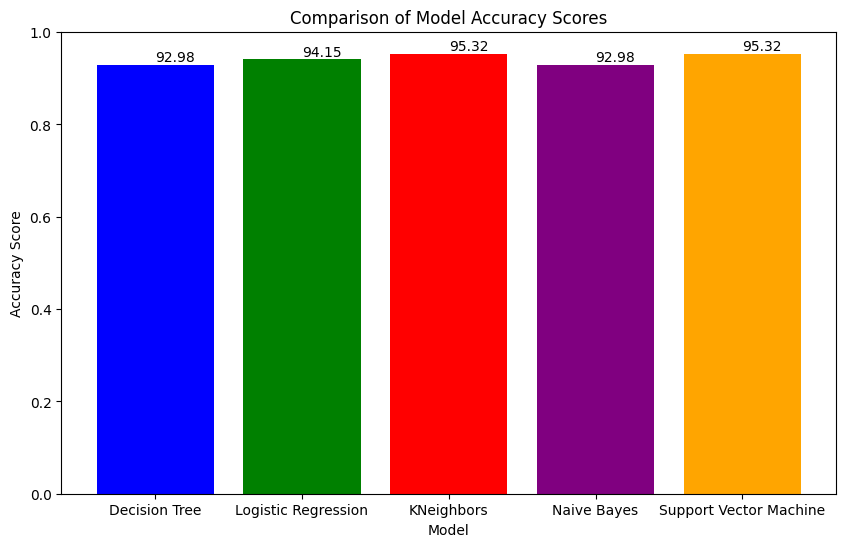

In [ ]:
accuracy_scores = {
    'Decision Tree': 0.9298245614035088,
    'Logistic Regression': 0.9415204678362573,
    'KNeighbors': 0.9532163742690059,
    'Naive Bayes': 0.9298245614035088,
    'Support Vector Machine': 0.9532163742690059
}

model_names = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, scores, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Comparison of Model Accuracy Scores')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')

# Adding the text on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval*100, 2), va='bottom')  # va='bottom' to align the text correctly

plt.show()


**Summary**

The bar plot comparison of model accuracy scores in our breast cancer prediction project indicates that KNeighbors and Support Vector Machine exhibit the highest accuracy, both surpassing 95%, which suggests their strong suitability for this specific classification task. Logistic Regression also shows a high accuracy of over 94%, making it another effective choice. Support Vector Machine and Logistic Regression performs better also because of that they are in general used for classification purposes. In contrast, Decision Tree and Naive Bayes, with accuracies around 93%, demonstrate comparatively lower performance in this dataset. Also worth noting that, the Decision tree model had better accuracy in the training phase shows that the model is overfitting in this scenario. So we can conclude that Support Vector Classifier, Logistic Regression and KNN may be more suitable for the given classification task.

